<a href="https://www.kaggle.com/code/maxigaarp/c2-operaciones-en-bd?scriptVersionId=132119861" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importamos librerias

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
library(dplyr)

Leemos la base de datos de IMDB (https://www.imdb.com/interfaces/). Usemos la función download.file:
 - download.file(URL, direccion_descarga)

In [ ]:
download.file("https://datasets.imdbws.com/title.basics.tsv.gz", "title.basics.tsv.gz")

Notemos que es un archivo ".tsv.gz". Para abrirlo podemos buscar en internet, nos dara que debemos usar la funcion gzfile y luego la funcion read_tsv

In [ ]:
?read_tsv

In [ ]:
read_tsv(gzfile("title.basics.tsv.gz"))

In [ ]:
peliculas <- as.data.frame(read_tsv(gzfile("title.basics.tsv.gz"), na = c("", "NA", "\\N")))

**Otra opcion para la gente que no le permite descargar el archivo**: buscar el dataset de imdb en kaggle y agregarlo (ya deberia estar agregado en Data>Input)

In [4]:
peliculas<- read_tsv("/kaggle/input/imdb-dataset/title.basics.tsv/data.tsv", na = c("", "NA", "\\N"))

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 9885705 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): tconst, titleType, primaryTitle, originalTitle, genres
dbl (4): isAdult, startYear, endYear, runtimeMinutes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(peliculas)

**Objetivo 1**: armar la base de datos descrita en las diapositivas.

# Proyección

In [ ]:
nombres <- c("tconst","primaryTitle","startYear","genres")

In [ ]:
tabla2 <- select(peliculas, c("tconst","primaryTitle","startYear","genres"))

In [ ]:
tabla2

# Filtros

Necesitamos filtrar los datos que no deberian estar dentro de la base de datos de peliculas

**Importante** ¿Qué datos tienen las columnas de la base de datos?

In [ ]:
tabla2

In [ ]:
peliculas$titleType

In [ ]:
unique(peliculas[["titleType"]])

In [ ]:
peliculas[1:10,  ]

In [ ]:
filter(peliculas,titleType=="movie")

In [ ]:
filter(peliculas,titleType=="tvMovie")

Otra opcion es condiciones mediante vectores booleanos, lo bueno es que se pueden usar filtros en los nombres de las columnas tambien (como una proyección)

In [ ]:
peliculas[peliculas["titleType"]=="movie",]

In [ ]:

peliculas[peliculas["titleType"]=="movie",]

In [ ]:
peliculas[peliculas["titleType"]=="movie",nombres]

Finalmente

In [ ]:
tabla2<- filter(peliculas,(titleType=="movie")| (titleType=="tvMovie")) %>%
          select( c("tconst","primaryTitle","startYear","genres"))

In [ ]:
tabla2

# Union

Otra manera de hacer esto seria unir las dos consultas filtradas.

In [ ]:
rbind(tabla2,tabla2)

In [ ]:
filter(peliculas,titleType=="movie")

In [ ]:
filter(peliculas,titleType=="tvMovie")

In [ ]:
union(filter(peliculas,titleType=="movie"), filter(peliculas,titleType=="tvMovie"))

Tambien existe la funcion cbind en R que nos permite unir las bases de datos por las columnas, es decir, agregar atributos.

## Agregar operaciones

Como agrupar lo que llevamos hasta el momento?
Recordar operador %>%

In [ ]:
peliculas %>% select(c("tconst","primaryTitle","startYear","genres")) %>%
              filter((titleType=="movie")| (titleType=="tvMovie"))

In [ ]:
peliculas %>% select(c("tconst","primaryTitle","startYear","genres", "titleType")) %>%
              filter((titleType=="movie")| (titleType=="tvMovie"))

Ahora deberiamos eliminar la columna titleType, podriamos seleccionar todas las columnas que nos interesan, sin embargo existe una forma mas facil en R

In [ ]:
peliculas2 <- peliculas %>% 
              select(c("tconst","primaryTitle","startYear","genres", "titleType")) %>%
              filter((titleType=="movie")| (titleType=="tvMovie")) %>%
              select(-c( "titleType"))

In [ ]:
peliculas2

# Renombrar

In [ ]:
names(peliculas2)

for ( ){
    
    
    
}

In [ ]:
peliculas2 <- rename(peliculas2,c('ID'='tconst', 'Nombre'='primaryTitle'))

In [ ]:
names(peliculas2)

In [ ]:
names(peliculas2) <- c("ID", "Nombre", "Agno", "Categoria")

In [ ]:
peliculas2

# Producto Cruz

Necesitamos unir la base de datos de peliculas con los ratings de ellas. Por esto tenemos que leer la base ratings

In [ ]:
download.file("https://datasets.imdbws.com/title.ratings.tsv.gz", "ratings.tsv.gz")

In [ ]:
ratings <- as.data.frame(read_tsv(gzfile("ratings.tsv.gz")))

In [ ]:
ratings

In [ ]:
peliculas2[1:1000,]

Usamos la funcion crossing podemos obtener el producto cruz de las bases de datos, si luego filtramos podemos obtener el comando join.

In [ ]:
crossing(peliculas2[1:1000,], ratings[1:1000,]) %>% filter(ID==tconst)

# Joins

Existen 4 tipos de join
 - Inner/natural join
 - Outer/full join
 - Left join
 - Right join

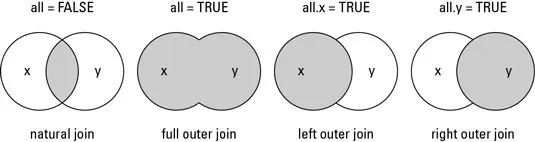

In [ ]:
peliculas2<-inner_join(peliculas2, ratings, c("ID"="tconst"))

In [ ]:
full_join(peliculas2, ratings, c("ID"="tconst"))

In [ ]:
left_join(peliculas2, ratings, c("ID"="tconst"))

In [ ]:
right_join(peliculas2, ratings, c("ID"="tconst"))

¿Por que el join por la derecha tiene muchas mas filas que el de la izquierda?

Finalmente hacemos los ajustes necesarios para la columna

In [ ]:
peliculas2<-inner_join(peliculas2, ratings, c("ID"="tconst"))

In [ ]:
peliculas2

In [ ]:
peliculas2 <- peliculas2 %>% select(-c("numVotes")) %>% rename(c("Calificacion"="averageRating"))

# Interseccion y Diferencia

Supongamos que queremos una lista de peliculas que sean de comedia y romanticas, esto seria una interseccion.

Si queremos la lista de peliculas que sean de comedia pero no de romance, seria diferencia.

Para hacer esto necesitamos modificar nuestras bases de datos

Necesitamos poder leer las categorias del film, lo cual no es posible tal como esta. Ayuda:
 - separate: permite separar una columna en varias según un caracter separador, ejemplo:
  - "hola; como; estan"-> "hola", " como", " estan"  
 - pivot_longer: convierte columnas de una fila a una sola columna distribuida en multiples filas

¿Como podemos obtener todas las peliculas de comedia? ¿y las de comedia romantica?

Necesario: 
 - semi_join(x, y) mantiene todas las observaciones en x con coincidencias en y.
 - anti_join(x, y) descarta todas las observaciones en x con coincidencias en y.

In [ ]:
peliculas2$Categoria[peliculas2$Categoria=="\\N"] <- NA

In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))

In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))%>%
separate("Categoria",c("C1","C2","C3"),  sep=",")

In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))%>%
separate("Categoria",c("C1","C2","C3"),  sep=",")%>%
pivot_longer(C1:C3,values_to = "Categoria")

In [ ]:
peliculas2[1:100,] %>% 
select(c("ID", "Categoria"))%>%
separate("Categoria",c("C1","C2","C3"),  sep=",")%>%
pivot_longer(C1:C3,values_to = "Categoria")%>%
drop_na("Categoria")

In [ ]:
ID_romance <- peliculas2[1:100,] %>% 
              select(c("ID", "Categoria"))%>%
              separate("Categoria",c("C1","C2","C3"),  sep=",")%>%
              pivot_longer(C1:C3,values_to = "Categoria")%>%
              drop_na("Categoria")
              filter(Categoria=="Romance") %>%
              select(c("ID"))

# Interseccion

In [ ]:
peliculas2 %>% semi_join(ID_comedy, by="ID")%>%
               semi_join(ID_romance, by="ID")

In [ ]:
peliculas2 %>% semi_join(ID_comedy, by="ID")%>%
               anti_join(ID_romance, by="ID")

# Otras Transformaciones de Dataframes

# Adicional

Nos gustaria descargar todos los links, además leer las bases de datos y asignarles un nombre. 

Un primer nombre puede ser el nombre del archivo en cuestion.

In [ ]:
library(xml2)
library(rvest)

URL <- "https://datasets.imdbws.com/"

pg <- read_html(URL)

links <- html_attr(html_nodes(pg, "a"), "href")

##Con esto extraemos todos los links de la pagina dicha

links<-as.data.frame(links[2:length(links)])
colnames(links)<-c("links")

names <- separate(links, "links",c("http","x","datasets", "name"),  sep="/")[["name"]]

dbs=list()
for(i in 1:length(names)){
  download.file(links[["links"]][i], names[i])
  dbs[[gsub(".tsv.gz", "",names[i])]]<-as.data.frame(read_tsv(gzfile(names[i])))
}

In [ ]:
#eliminamos tsv.gz para volverlo un nombre
gsub(".tsv.gz", "", "name.basics.tsv.gz")

In [ ]:
nombres<-as.data.frame(read_tsv(gzfile("name.basics.tsv.gz")))

In [ ]:
titulos<-as.data.frame(read_tsv(gzfile("title.basics.tsv.gz")))

In [ ]:
titulos3<-as.data.frame(read_tsv(gzfile("title.principals.tsv.gz")))

In [ ]:
titulos3

In [ ]:
read_tsv(gzfile("name.basics.tsv.gz"))